# Raynold Dataset Project

# #Author: FARHANA HOQUE

In [1]:
# import necessary Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Load the Reynolds dataset
dataset_reynolds = pd.read_excel(r"F:\ABP\Raynold dataset Only.xlsx")
print(dataset_reynolds.head())

   Months Employed  Scales Sold
0               41          275
1              106          296
2               76          317
3              100          376
4               22          162


In [3]:
# Fit a linear model between 'Months Employed' and 'Scales Sold'
X_reynolds = sm.add_constant(dataset_reynolds['Months Employed'])
y_reynolds = dataset_reynolds['Scales Sold']
linear_model_reynolds = sm.OLS(y_reynolds, X_reynolds).fit()
print(linear_model_reynolds.summary())

                            OLS Regression Results                            
Dep. Variable:            Scales Sold   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     48.95
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           9.40e-06
Time:                        15:43:57   Log-Likelihood:                -78.431
No. Observations:                  15   AIC:                             160.9
Df Residuals:                      13   BIC:                             162.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             113.7453     20.813     

C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
# Calculate residuals and error squared
predicted_scales_sold = linear_model_reynolds.predict(X_reynolds)
error_reynolds = y_reynolds - predicted_scales_sold
error_square_reynolds = error_reynolds**2
error_square_reynolds

0     4120.189736
1     4719.199665
2      544.171201
3      650.675945
4       14.664971
5       61.546365
6     2706.112111
7     4696.874799
8      378.062613
9        0.264266
10     945.272699
11     909.315032
12    3714.910930
13    6190.030960
14     916.448703
dtype: float64

In [6]:
# Calculate and print mean squared error and root mean squared error
mse_reynolds = error_square_reynolds.mean()
rmse_reynolds = np.sqrt(mse_reynolds)
print("Mean Squared Error:", mse_reynolds)
print("Root Mean Squared Error:", rmse_reynolds)

Mean Squared Error: 2037.8493330216504
Root Mean Squared Error: 45.142544600649735


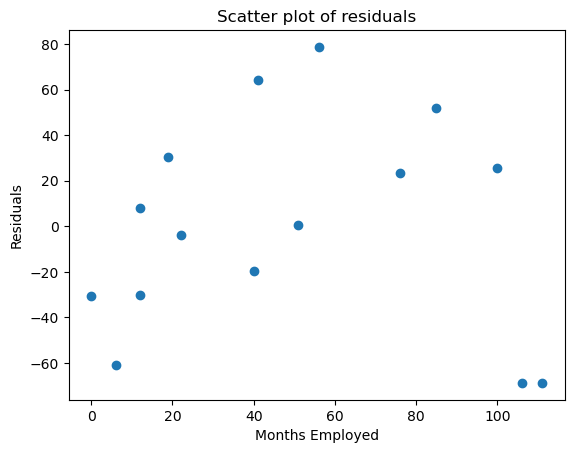

In [7]:
# Plot the residuals
plt.scatter(dataset_reynolds['Months Employed'], error_reynolds)
plt.title("Scatter plot of residuals")
plt.xlabel("Months Employed")
plt.ylabel("Residuals")
plt.show()

In [8]:
# Create 'Months Employed Squared' and add it to the dataset
dataset_reynolds['Months Employed Squared'] = dataset_reynolds['Months Employed'] ** 2
print(dataset_reynolds.head())

   Months Employed  Scales Sold  Months Employed Squared
0               41          275                     1681
1              106          296                    11236
2               76          317                     5776
3              100          376                    10000
4               22          162                      484


In [9]:
# Fit a new linear model including the squared term
X_reynolds_2 = dataset_reynolds[['Months Employed', 'Months Employed Squared']]
X_reynolds_2 = sm.add_constant(X_reynolds_2)
linear_model_reynolds_2 = sm.OLS(y_reynolds, X_reynolds_2).fit()
print(linear_model_reynolds_2.summary())

                            OLS Regression Results                            
Dep. Variable:            Scales Sold   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     54.78
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           9.25e-07
Time:                        15:45:01   Log-Likelihood:                -72.775
No. Observations:                  15   AIC:                             151.5
Df Residuals:                      12   BIC:                             153.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
# Calculate residuals for the new model and error squared
predicted_scales_sold_2 = linear_model_reynolds_2.predict(X_reynolds_2)
error_reynolds_2 = y_reynolds - predicted_scales_sold_2
error_square_reynolds_2 = error_reynolds_2**2
error_square_reynolds_2

0      733.625530
1     1149.524140
2       58.111526
3     1822.119728
4      155.172356
5      538.141934
6     1220.219023
7      301.307516
8     3092.078125
9     1813.364840
10     465.267718
11     219.102566
12     797.066679
13    1218.535326
14     794.585375
dtype: float64

In [12]:
# Calculate and print mean squared error and root mean squared error for the new model
mse_reynolds_2 = error_square_reynolds_2.mean()
rmse_reynolds_2 = np.sqrt(mse_reynolds_2)
print("Mean Squared Error (with squared term):", mse_reynolds_2)
print("Root Mean Squared Error (with squared term):", rmse_reynolds_2)

Mean Squared Error (with squared term): 958.5481588505646
Root Mean Squared Error (with squared term): 30.960428919034126


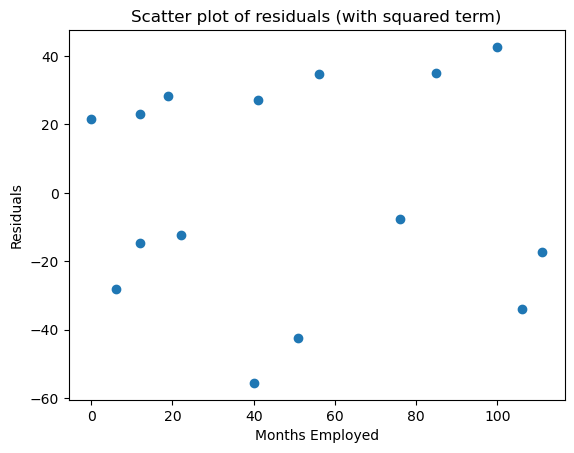

In [13]:
# Plot the residuals for the new model
plt.scatter(dataset_reynolds['Months Employed'], error_reynolds_2)
plt.title("Scatter plot of residuals (with squared term)")
plt.xlabel("Months Employed")
plt.ylabel("Residuals")
plt.show()

# !Done